# Board Certification Change Impact Analysis

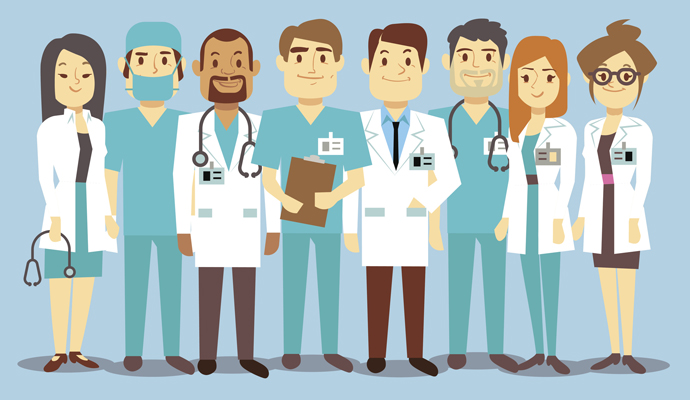

## I. Problem Statement

This analysis aims at understanding the impact of board certification changes that were made in the year 1990 by leveraging available data on physicians and adherence evaluations from years 1971-2002. Our findings will help determine whether or not the changes implemented are effective (and worthwhile) in increasing adherence evaluations. We will explore the following questions:
<br>
<br>
Part 1: Prior to 1990, to what degree does it appear that physicians who passed their initial
certification exams were more/less likely to follow clinical guidelines during their subsequent
careers?
<br>
<br>
Part 2: How do the two changes that were made to the certification process in 1990 appear to have
impacted physician behavior? Does the board appear to have succeeded in making the initial
certification exams more stringent? Have the maintenance-of-certification exams increased
guideline adherence? Were physicians' concerns about the changes justified? In responding,
please note any instances where you think of multiple hypotheses that might explain a given
observation.

## II. Data Pull

The first step in doing our analysis is gathering the tools that will be instrumental to our work by importing necessary libraries that will be used in this analysis:

In [1]:
import pandas as pd #library to handle data, framing, etc.
import numpy as np #library to for data modeling
import matplotlib.pyplot as plt #visualizing data
import matplotlib.ticker as tck
import seaborn as sb #visualizing data

%matplotlib inline
pd.set_option('display.max_columns', None)

Data comes in a variety of sizes and formats. Excel files do not always contain just one sheet of data, but multiple. Hence, it is best practice to always check how many sheets are present in the data file:

In [2]:
data_file = pd.ExcelFile('match data_exercise_to _share (1).xlsx')
data_file.sheet_names

['background', 'adherence_evaluations']

## III. Data Cleanse

Now that we have brought in our data, we would want to understand its quality, so that we may know the limitations and how to correct them before proceeding with our analysis. The areas to assess quality are as follows:
<br>
    &emsp;i. Data Count
    <br>
    &emsp;ii. Data Distribution
    <br>
    &emsp;iii. Null Records
    <br>
    &emsp;iv. Duplicate Records
    <br>
    &emsp;iv. Data Join

#### i. Data Count

Create a separate dataframe for each sheet:

In [3]:
data_background = pd.read_excel(data_file, 'background')
data_evals = pd.read_excel(data_file, 'adherence_evaluations')

In [4]:
data_background.shape

(15472, 3)

_Quick assessment of the **background** dataset shows that we have 15,472 records and three columns._

In [5]:
data_evals.shape

(15473, 32)

_We know there are 15,472 records from the **background** data. However, assuming that we have evaluations data for the same set of physicians, then why does the **adherence evaluations** data sheet show 15,473 records? This could be a data hygiene issue._

#### ii. Data Distribution 

Datasheet **background**:

In [6]:
data_background.head()

,physician_uid,training_year,board_cert_year
0,10000831640,1970,1970
1,10001811121,1970,1970
2,10002674776,1970,1970
3,10003837524,1970,1970
4,10004856810,1970,1970


_The **background** dataset is indexed by 'physician uid'; data for 'training year' seems to begin with 1970._

In [7]:
data_background.tail()

,physician_uid,training_year,board_cert_year
15467,25994322770,2001,2001
15468,25995446298,2001,2001
15469,25996388376,2001,2001
15470,25997239841,2001,2001
15471,25998368317,2001,2001


_Data for 'training year' seems to end with 2001, but we should not be too sure as data could be sorted out of order._

In [8]:
data_background.training_year.unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001],
      dtype=int64)

_By listing the unique values for 'training year' we can now be sure that our 'training year' data spans 31 years._

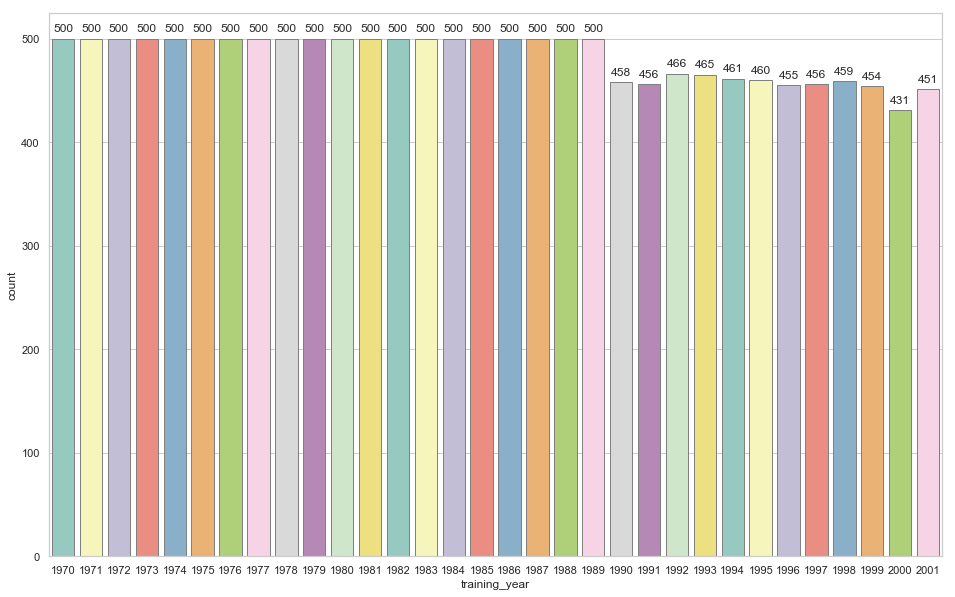

In [10]:
## physicians count by training year
sb.set(style='whitegrid')
dims = (16, 10)
fig, ax = plt.subplots(figsize=dims)
a = sb.countplot(ax=ax, x='training_year', data=data_background, palette='Set3',
              edgecolor=".5")
for p in a.patches:
    a.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
                                                     p.get_height()), ha = 'center', 
                     va = 'center', xytext = (0, 10), textcoords = 'offset points')
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .2)
change_width(ax, .8)

_We have roughly the same amount of records for each training year prior to 1990, however there seems to be a decrease starting in 1990._
<br>
_**Note 1:** There are less physicians count beginning in 1990 and the years after._

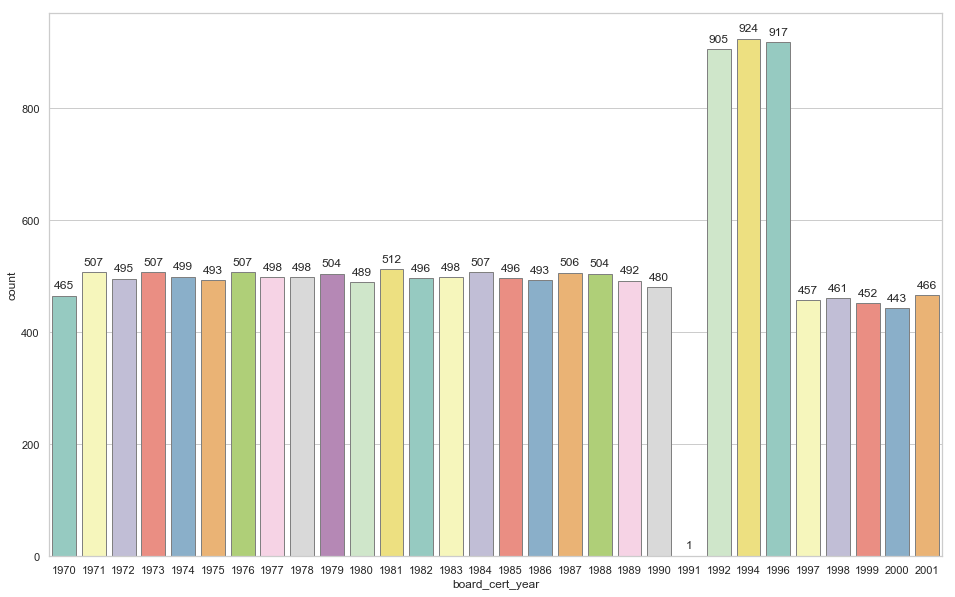

In [12]:
## physicians count by board certification year
sb.set(style='whitegrid')
dims = (16, 10)
fig, ax = plt.subplots(figsize=dims)
a = sb.countplot(ax=ax, x='board_cert_year', data=data_background, palette='Set3',
              edgecolor=".5")
for p in a.patches:
    a.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
                                                     p.get_height()), ha = 'center', 
                     va = 'center', xytext = (0, 10), textcoords = 'offset points')
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .2)
change_width(ax, .8)

_**Note 2:** There seems to be a spike in board certifications the first few years post 1990, but also gaps for some years such as 1993 and 1995._

Datasheet **adherence_evaluations**:

In [13]:
data_evals.head()

,evaluation_year,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
physician_uid,1971.000000,1972.000000,1973.000000,1974.000000,1975.000000,1976.000000,1977.000000,1978.000000,1979.000000,1980.000000,1981.000000,1982.000000,1983.000000,1984.000000,1985.000000,1986.000000,1987.000000,1988.000000,1989.000000,1990.0,1991.000000,1992.0,1993.0,1994.000000,1995.00000,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0
10000831640,45.558857,56.595450,53.878878,36.174120,58.222748,23.343721,29.327773,77.707741,48.462271,50.294023,33.502006,44.763913,53.831220,20.000000,48.412999,51.563866,40.661628,49.788089,75.875262,20.0,43.265894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001811121,49.955430,80.417479,97.212223,74.138971,78.050364,100.000000,99.708405,61.196762,89.460141,66.048597,78.430866,94.370367,91.981254,77.528190,81.768735,71.433983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002674776,71.721077,83.536145,66.805359,44.746217,54.165204,100.000000,100.000000,84.145488,92.918523,82.623151,67.918185,66.336980,57.731265,100.000000,71.765654,63.114344,75.078860,86.987376,50.698319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003837524,82.726071,94.658082,85.321196,99.326632,85.505298,94.673752,59.769285,100.000000,91.684239,83.074014,94.449150,62.023613,100.000000,90.097702,97.034406,85.566479,97.434985,99.454431,100.000000,100.0,84.305441,100.0,100.0,85.079873,91.88697,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data_evals.tail()

,evaluation_year,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
25994322770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.724687
25995446298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000
25996388376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.581853
25997239841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000
25998368317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.221462


_We can see the **adherence evaluations** data is also indexed by 'physician uid'. It is now clear that the extra record count in the evaluations dataset is from the top row describing the feature columns as "evaluation year". The first and last physician ids also match those in the **background** dataset._

We will remove the first row for better data readability, since it does not contain any data and is not useful in our analysis:

In [15]:
data_evals = pd.read_excel(data_file, 'adherence_evaluations', header=1)

We will rename our column names to ensure there are no whitespace in its formatting:

In [16]:
data_evals.rename(columns={data_evals.columns[1]:'eval_yr_1971',
                           data_evals.columns[2]:'eval_yr_1972',
                           data_evals.columns[3]:'eval_yr_1973',
                           data_evals.columns[4]:'eval_yr_1974',
                           data_evals.columns[5]:'eval_yr_1975',
                           data_evals.columns[6]:'eval_yr_1976',
                           data_evals.columns[7]:'eval_yr_1977',
                           data_evals.columns[8]:'eval_yr_1978',
                           data_evals.columns[9]:'eval_yr_1979',
                           data_evals.columns[10]:'eval_yr_1980',
                           data_evals.columns[11]:'eval_yr_1981',
                           data_evals.columns[12]:'eval_yr_1982',
                           data_evals.columns[13]:'eval_yr_1983',
                           data_evals.columns[14]:'eval_yr_1984',
                           data_evals.columns[15]:'eval_yr_1985',
                           data_evals.columns[16]:'eval_yr_1986',
                           data_evals.columns[17]:'eval_yr_1987',
                           data_evals.columns[18]:'eval_yr_1988',
                           data_evals.columns[19]:'eval_yr_1989',
                           data_evals.columns[20]:'eval_yr_1990',
                           data_evals.columns[21]:'eval_yr_1991',
                           data_evals.columns[22]:'eval_yr_1992',
                           data_evals.columns[23]:'eval_yr_1993',
                           data_evals.columns[24]:'eval_yr_1994',
                           data_evals.columns[25]:'eval_yr_1995',
                           data_evals.columns[26]:'eval_yr_1996',
                           data_evals.columns[27]:'eval_yr_1997',
                           data_evals.columns[28]:'eval_yr_1998',
                           data_evals.columns[29]:'eval_yr_1999',
                           data_evals.columns[30]:'eval_yr_2000',
                           data_evals.columns[31]:'eval_yr_2001',
                           data_evals.columns[32]:'eval_yr_2002',
                          }, inplace=True)

In [17]:
data_evals.shape

(15472, 33)

_The evaluations dataset now contain the same amount of records as the bacgkround dataset._

In [18]:
data_evals.describe()

,physician_uid,eval_yr_1971,eval_yr_1972,eval_yr_1973,eval_yr_1974,eval_yr_1975,eval_yr_1976,eval_yr_1977,eval_yr_1978,eval_yr_1979,eval_yr_1980,eval_yr_1981,eval_yr_1982,eval_yr_1983,eval_yr_1984,eval_yr_1985,eval_yr_1986,eval_yr_1987,eval_yr_1988,eval_yr_1989,eval_yr_1990,eval_yr_1991,eval_yr_1992,eval_yr_1993,eval_yr_1994,eval_yr_1995,eval_yr_1996,eval_yr_1997,eval_yr_1998,eval_yr_1999,eval_yr_2000,eval_yr_2001,eval_yr_2002
count,1.547200e+04,465.000000,972.000000,1467.000000,1974.000000,2473.000000,2966.000000,3473.000000,3971.000000,4469.000000,4964.000000,5437.000000,5925.000000,6399.000000,6867.000000,7348.000000,7803.000000,8252.000000,8703.000000,9138.000000,8998.000000,9371.000000,9253.000000,9983.000000,9821.000000,10104.000000,9920.000000,10577.000000,10808.000000,10961.000000,10832.000000,10968.000000,11053.000000
mean,1.782260e+10,68.849083,69.350254,69.168665,69.196953,68.757659,68.934799,69.437759,68.862042,68.529230,68.951861,68.698918,68.854432,68.403108,68.787204,69.140230,69.074751,68.971039,68.700840,68.986178,69.306514,69.613392,69.265685,69.792653,69.658128,69.630943,70.100730,70.070358,70.368336,69.955166,70.350196,70.232891,70.112962
std,4.582450e+09,23.157542,22.910723,23.470500,23.634592,23.677231,23.574607,23.519808,23.361239,23.322361,23.639157,23.681568,23.462215,23.624919,23.378974,23.501599,23.543963,23.518512,23.619388,23.496206,23.350606,23.510909,23.540791,23.146465,23.284352,23.400213,23.374439,23.179287,23.177469,23.372794,23.309375,23.167361,23.273789
min,1.000083e+10,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
25%,1.386845e+10,51.572713,53.504744,52.371130,50.601588,51.765901,51.546382,52.471264,51.613816,51.541630,51.950168,51.358968,52.248106,51.309917,51.814084,52.039460,52.080437,52.003243,51.400279,51.636106,52.430080,52.450052,52.432470,53.239986,52.905692,52.839866,53.591120,53.683431,53.869393,52.897404,53.883422,53.676525,53.251243
50%,1.773619e+10,70.879970,70.864474,71.175694,71.228901,70.759396,70.611982,72.171555,70.590947,70.749968,70.663591,70.547138,70.680501,70.146308,70.862254,71.257401,70.926909,70.891180,70.741840,70.805524,71.123432,72.061283,71.393184,71.693849,71.631518,71.702952,72.261196,72.228217,72.375551,72.158922,72.728467,72.296537,72.143254
75%,2.174452e+10,88.797754,89.331879,89.399408,90.038306,89.230488,89.249014,89.383355,89.092313,88.385755,89.664596,89.304542,89.053399,88.782043,89.094654,89.673196,89.641533,89.088424,89.139931,89.546136,89.732239,90.066008,89.625779,90.178067,90.170513,90.017205,90.867710,90.327511,90.903093,90.426007,91.411032,90.758265,90.993463
max,2.599837e+10,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


_The adherence rating has a consistent range from 20 to 100 for every evaluation year. The mean rating for each evaluation years post-1990 (ranging from 69.3-70.4) does seem to be higher than those pre-1990 (ranging from 68.4-69.4)._

#### iii. Null Records 

In [19]:
data_background.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15472 entries, 0 to 15471
Data columns (total 3 columns):
physician_uid      15472 non-null int64
training_year      15472 non-null int64
board_cert_year    15472 non-null int64
dtypes: int64(3)
memory usage: 362.7 KB


_There are no null records. What a relief! If there were, then we will explore methods to address this data gap before we can proceed with modeling (i.e. data imputation)._

In [20]:
data_background['training_year'].value_counts().sort_index()

1970    500
1971    500
1972    500
1973    500
1974    500
1975    500
1976    500
1977    500
1978    500
1979    500
1980    500
1981    500
1982    500
1983    500
1984    500
1985    500
1986    500
1987    500
1988    500
1989    500
1990    458
1991    456
1992    466
1993    465
1994    461
1995    460
1996    455
1997    456
1998    459
1999    454
2000    431
2001    451
Name: training_year, dtype: int64

_**Note 3:** Number of physicians completing residency drops over time._

In [21]:
data_background['board_cert_year'].value_counts().sort_index()

1970    465
1971    507
1972    495
1973    507
1974    499
1975    493
1976    507
1977    498
1978    498
1979    504
1980    489
1981    512
1982    496
1983    498
1984    507
1985    496
1986    493
1987    506
1988    504
1989    492
1990    480
1991      1
1992    905
1994    924
1996    917
1997    457
1998    461
1999    452
2000    443
2001    466
Name: board_cert_year, dtype: int64

_**Note 4:** There was only 1 physician obtaining board certification in 1991. We will review this further in our data analysis section._

In [22]:
data_evals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15472 entries, 0 to 15471
Data columns (total 33 columns):
physician_uid    15472 non-null int64
eval_yr_1971     465 non-null float64
eval_yr_1972     972 non-null float64
eval_yr_1973     1467 non-null float64
eval_yr_1974     1974 non-null float64
eval_yr_1975     2473 non-null float64
eval_yr_1976     2966 non-null float64
eval_yr_1977     3473 non-null float64
eval_yr_1978     3971 non-null float64
eval_yr_1979     4469 non-null float64
eval_yr_1980     4964 non-null float64
eval_yr_1981     5437 non-null float64
eval_yr_1982     5925 non-null float64
eval_yr_1983     6399 non-null float64
eval_yr_1984     6867 non-null float64
eval_yr_1985     7348 non-null float64
eval_yr_1986     7803 non-null float64
eval_yr_1987     8252 non-null float64
eval_yr_1988     8703 non-null float64
eval_yr_1989     9138 non-null float64
eval_yr_1990     8998 non-null float64
eval_yr_1991     9371 non-null float64
eval_yr_1992     9253 non-null float

_**Note 5**: By evaluation year 2002, there should not be any nulls because all physicians would have gotten their certifications already, but we only have 11,053 records of the 15,472 physicians that we have._

#### iv. Duplicate Records 

In [24]:
data_background_dups=data_background.duplicated('physician_uid')

In [25]:
data_background_dups.value_counts()

False    15472
dtype: int64

In [26]:
data_evals_dups=data_evals.duplicated('physician_uid')

In [27]:
data_evals_dups.value_counts()

False    15472
dtype: int64

_Yay! All records are identified as "False" under our duplicate count, which means there are no duplicates for our 'physician uid' column in both datasets._

#### v. Data Join 

Since both our datasets are indexed by physician_uid, we can join the two together to make our analysis more efficient:

In [28]:
data = pd.merge(left=data_background, right=data_evals, how='left', on='physician_uid')

In [29]:
data.head()

,physician_uid,training_year,board_cert_year,eval_yr_1971,eval_yr_1972,eval_yr_1973,eval_yr_1974,eval_yr_1975,eval_yr_1976,eval_yr_1977,eval_yr_1978,eval_yr_1979,eval_yr_1980,eval_yr_1981,eval_yr_1982,eval_yr_1983,eval_yr_1984,eval_yr_1985,eval_yr_1986,eval_yr_1987,eval_yr_1988,eval_yr_1989,eval_yr_1990,eval_yr_1991,eval_yr_1992,eval_yr_1993,eval_yr_1994,eval_yr_1995,eval_yr_1996,eval_yr_1997,eval_yr_1998,eval_yr_1999,eval_yr_2000,eval_yr_2001,eval_yr_2002
0,10000831640,1970,1970,45.558857,56.595450,53.878878,36.174120,58.222748,23.343721,29.327773,77.707741,48.462271,50.294023,33.502006,44.763913,53.831220,20.000000,48.412999,51.563866,40.661628,49.788089,75.875262,20.0000,43.265894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001811121,1970,1970,49.955430,80.417479,97.212223,74.138971,78.050364,100.000000,99.708405,61.196762,89.460141,66.048597,78.430866,94.370367,91.981254,77.528190,81.768735,71.433983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10002674776,1970,1970,71.721077,83.536145,66.805359,44.746217,54.165204,100.000000,100.000000,84.145488,92.918523,82.623151,67.918185,66.336980,57.731265,100.000000,71.765654,63.114344,75.078860,86.987376,50.698319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10003837524,1970,1970,82.726071,94.658082,85.321196,99.326632,85.505298,94.673752,59.769285,100.000000,91.684239,83.074014,94.449150,62.023613,100.000000,90.097702,97.034406,85.566479,97.434985,99.454431,100.000000,100.0000,84.305441,100.0,100.0,85.079873,91.88697,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10004856810,1970,1970,67.395845,27.988807,41.587377,30.847542,47.348051,30.036957,71.645535,41.286300,29.784817,37.796494,84.564122,48.285947,84.327049,47.106156,78.410072,47.818587,43.660272,61.956948,52.033791,25.8418,28.439319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
data.tail()

,physician_uid,training_year,board_cert_year,eval_yr_1971,eval_yr_1972,eval_yr_1973,eval_yr_1974,eval_yr_1975,eval_yr_1976,eval_yr_1977,eval_yr_1978,eval_yr_1979,eval_yr_1980,eval_yr_1981,eval_yr_1982,eval_yr_1983,eval_yr_1984,eval_yr_1985,eval_yr_1986,eval_yr_1987,eval_yr_1988,eval_yr_1989,eval_yr_1990,eval_yr_1991,eval_yr_1992,eval_yr_1993,eval_yr_1994,eval_yr_1995,eval_yr_1996,eval_yr_1997,eval_yr_1998,eval_yr_1999,eval_yr_2000,eval_yr_2001,eval_yr_2002
15467,25994322770,2001,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.724687
15468,25995446298,2001,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000
15469,25996388376,2001,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.581853
15470,25997239841,2001,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000
15471,25998368317,2001,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.221462


Let's check to see why there are nulls in evaluation year 2002:

In [31]:
data_test_null = data[data.eval_yr_2002.isnull()]

In [32]:
data_test_null.groupby(['training_year']).count()

,physician_uid,board_cert_year,eval_yr_1971,eval_yr_1972,eval_yr_1973,eval_yr_1974,eval_yr_1975,eval_yr_1976,eval_yr_1977,eval_yr_1978,eval_yr_1979,eval_yr_1980,eval_yr_1981,eval_yr_1982,eval_yr_1983,eval_yr_1984,eval_yr_1985,eval_yr_1986,eval_yr_1987,eval_yr_1988,eval_yr_1989,eval_yr_1990,eval_yr_1991,eval_yr_1992,eval_yr_1993,eval_yr_1994,eval_yr_1995,eval_yr_1996,eval_yr_1997,eval_yr_1998,eval_yr_1999,eval_yr_2000,eval_yr_2001,eval_yr_2002
training_year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970,325,325,304,325,325,325,325,325,325,325,325,316,311,305,300,293,290,279,272,264,253,209,199,186,165,152,114,103,92,82,56,18,11,0
1971,312,312,0,294,312,312,312,312,312,312,312,312,301,291,290,287,282,276,268,258,247,204,194,189,176,160,120,104,86,73,60,37,21,0
1972,305,305,0,0,285,304,305,305,305,305,305,305,305,297,293,289,285,282,277,270,266,227,220,212,194,182,138,124,114,94,74,39,19,0
1973,288,288,0,0,0,274,288,288,288,288,288,288,288,288,276,271,268,261,260,252,243,204,199,193,181,170,127,117,98,87,65,24,11,0
1974,259,259,0,0,0,0,239,256,259,259,259,259,259,259,259,248,247,244,236,232,227,183,174,159,149,139,102,91,87,68,59,27,9,0
1975,259,259,0,0,0,0,0,242,259,259,259,259,259,259,259,259,249,246,245,241,234,193,188,183,174,167,128,116,107,94,80,36,15,0
1976,227,227,0,0,0,0,0,0,215,227,227,227,227,227,227,227,227,219,216,214,210,165,161,153,146,135,105,96,81,65,57,30,9,0
1977,227,227,0,0,0,0,0,0,0,208,227,227,227,227,227,227,227,227,216,213,211,163,159,157,148,143,102,87,77,66,49,24,13,0
1978,222,222,0,0,0,0,0,0,0,0,205,221,222,222,222,222,222,222,222,213,210,173,170,165,153,143,96,88,79,69,63,27,18,0


In [33]:
data_test_null.groupby(['training_year']).mean()

,physician_uid,board_cert_year,eval_yr_1971,eval_yr_1972,eval_yr_1973,eval_yr_1974,eval_yr_1975,eval_yr_1976,eval_yr_1977,eval_yr_1978,eval_yr_1979,eval_yr_1980,eval_yr_1981,eval_yr_1982,eval_yr_1983,eval_yr_1984,eval_yr_1985,eval_yr_1986,eval_yr_1987,eval_yr_1988,eval_yr_1989,eval_yr_1990,eval_yr_1991,eval_yr_1992,eval_yr_1993,eval_yr_1994,eval_yr_1995,eval_yr_1996,eval_yr_1997,eval_yr_1998,eval_yr_1999,eval_yr_2000,eval_yr_2001,eval_yr_2002
training_year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970,1.024849e+10,1970.064615,66.840771,67.322650,66.640963,67.351329,67.905503,67.152534,67.761574,68.520959,68.236229,68.575187,66.082038,67.603182,67.393542,68.935407,69.075727,69.836739,69.778634,67.283036,68.033085,69.311229,67.937408,67.760087,68.577519,68.659282,70.757548,67.440802,69.571152,68.590792,65.383424,66.008144,62.124177,NaN
1971,1.074900e+10,1971.057692,NaN,69.535262,68.770534,67.652235,68.140259,68.287045,67.641488,69.012851,67.033737,68.491023,68.448638,67.997407,68.191378,69.206148,68.582361,69.408326,68.307937,68.189113,69.305600,68.768068,68.870524,69.132431,70.129487,69.629512,68.806604,66.228585,71.306186,69.582409,71.566181,75.097728,79.304431,NaN
1972,1.124237e+10,1972.068852,NaN,NaN,67.941037,68.703770,66.229622,67.912650,67.493347,68.770776,65.009426,66.749890,66.222576,67.608865,68.410039,65.587752,67.560851,68.357759,67.860031,67.344540,67.911210,66.752939,67.507911,67.912062,66.588400,68.604603,68.249097,66.599825,69.229144,69.750499,70.488061,67.584862,58.965748,NaN
1973,1.175412e+10,1973.048611,NaN,NaN,NaN,68.226513,66.371719,66.376387,67.816072,66.980437,68.551640,68.129772,67.544604,66.904328,66.517121,67.526956,69.709047,65.158416,67.742141,68.348743,66.776187,67.839779,69.103999,70.629451,68.401303,69.090671,70.785442,70.891389,72.706200,68.049917,68.378471,70.090909,54.844469,NaN
1974,1.225278e+10,1974.088803,NaN,NaN,NaN,NaN,68.094732,68.341621,67.477491,66.639054,65.229703,68.444191,68.454922,69.286797,65.827780,67.404231,68.459557,68.405428,66.367410,68.982978,66.677608,67.081898,65.121534,68.332583,67.782780,68.397670,68.381583,70.111652,68.218527,66.765067,69.145487,71.872757,77.839342,NaN
1975,1.273559e+10,1975.065637,NaN,NaN,NaN,NaN,NaN,67.648586,67.162343,65.783626,66.617888,66.613436,66.092205,65.002742,67.067700,64.365746,66.960191,66.473633,65.713173,66.597458,67.184806,65.963570,66.585370,65.841455,65.783471,66.313571,68.906844,69.011981,64.837655,67.067154,67.085542,73.841810,79.017732,NaN
1976,1.324098e+10,1976.052863,NaN,NaN,NaN,NaN,NaN,NaN,67.426514,68.283964,67.644273,67.251326,68.544599,65.762058,66.923531,64.289860,67.946646,68.619541,67.670068,67.553352,68.049216,69.556140,68.915800,66.784777,70.543192,68.085369,67.890606,68.392691,68.497303,63.152695,67.308036,72.223393,66.046972,NaN
1977,1.376296e+10,1977.083700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.216094,63.578895,63.719733,65.391834,63.905179,63.058149,64.715065,63.638129,62.935487,63.638825,61.557472,61.468687,63.832340,66.508541,64.189952,65.648482,67.984425,67.004520,67.548063,67.609724,60.877742,65.037323,65.992511,71.471602,NaN
1978,1.425233e+10,1978.081081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.612388,66.440087,66.481090,67.405433,65.352630,65.531435,65.300257,67.132981,65.474557,66.078793,66.171828,66.204709,67.014603,67.109280,68.465537,68.122573,69.762121,69.233346,68.916431,69.819102,70.899829,78.208655,70.091407,NaN


_**Note 6:** The majority of physicians not being evaluated in year 2002 are from groups trained in the 1970s and 1980s. With the exception of physicians trained in 1992, the majority of 1990s-trained not evaluated in 2002 have below average ratings. The seemingly higher average rating that we see in evaluation years post 1990 could be due to older physicians and those with lower ratings to drop out of being evaluated._

Let's separate pre-1990 certified data from post-1990 to see average rating by evaluation years:

In [34]:
## certified pre-1990
data[data.board_cert_year < 1990].describe()

,physician_uid,training_year,board_cert_year,eval_yr_1971,eval_yr_1972,eval_yr_1973,eval_yr_1974,eval_yr_1975,eval_yr_1976,eval_yr_1977,eval_yr_1978,eval_yr_1979,eval_yr_1980,eval_yr_1981,eval_yr_1982,eval_yr_1983,eval_yr_1984,eval_yr_1985,eval_yr_1986,eval_yr_1987,eval_yr_1988,eval_yr_1989,eval_yr_1990,eval_yr_1991,eval_yr_1992,eval_yr_1993,eval_yr_1994,eval_yr_1995,eval_yr_1996,eval_yr_1997,eval_yr_1998,eval_yr_1999,eval_yr_2000,eval_yr_2001,eval_yr_2002
count,9.966000e+03,9966.000000,9966.000000,465.000000,972.000000,1467.000000,1974.000000,2473.000000,2966.000000,3473.000000,3971.000000,4469.000000,4964.000000,5437.000000,5925.000000,6399.000000,6867.000000,7348.000000,7803.000000,8252.000000,8703.000000,9138.000000,8998.000000,8891.000000,8772.000000,8597.000000,8435.000000,7829.000000,7645.000000,7452.000000,7226.000000,6985.000000,6447.000000,6212.000000,5962.000000
mean,1.498402e+10,1979.467690,1979.524684,68.849083,69.350254,69.168665,69.196953,68.757659,68.934799,69.437759,68.862042,68.529230,68.951861,68.698918,68.854432,68.403108,68.787204,69.140230,69.074751,68.971039,68.700840,68.986178,69.306514,69.641802,69.263533,69.765610,69.743841,69.753217,70.307333,70.453045,70.495566,70.388384,70.825709,70.774518,70.749237
std,2.878412e+09,5.749749,5.749037,23.157542,22.910723,23.470500,23.634592,23.677231,23.574607,23.519808,23.361239,23.322361,23.639157,23.681568,23.462215,23.624919,23.378974,23.501599,23.543963,23.518512,23.619388,23.496206,23.350606,23.531680,23.524157,23.202637,23.276303,23.440460,23.376190,23.084372,23.166167,23.296521,23.088246,22.927032,23.138354
min,1.000083e+10,1970.000000,1970.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
25%,1.249187e+10,1974.000000,1975.000000,51.572713,53.504744,52.371130,50.601588,51.765901,51.546382,52.471264,51.613816,51.541630,51.950168,51.358968,52.248106,51.309917,51.814084,52.039460,52.080437,52.003243,51.400279,51.636106,52.430080,52.450052,52.467594,53.109981,53.120872,53.287841,53.933433,54.347232,53.957977,53.591559,54.788636,54.324087,53.814959
50%,1.498329e+10,1979.000000,1980.000000,70.879970,70.864474,71.175694,71.228901,70.759396,70.611982,72.171555,70.590947,70.749968,70.663591,70.547138,70.680501,70.146308,70.862254,71.257401,70.926909,70.891180,70.741840,70.805524,71.123432,72.092970,71.461686,71.685844,71.761956,71.936923,72.525118,72.819376,72.516398,72.814887,73.077120,72.854737,72.671268
75%,1.747439e+10,1984.000000,1984.000000,88.797754,89.331879,89.399408,90.038306,89.230488,89.249014,89.383355,89.092313,88.385755,89.664596,89.304542,89.053399,88.782043,89.094654,89.673196,89.641533,89.088424,89.139931,89.546136,89.732239,90.171826,89.584058,90.209895,90.386185,90.156217,91.046961,90.686427,90.922475,90.853437,91.877496,90.878125,91.710817
max,1.999987e+10,1989.000000,1989.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [35]:
## certified post-1990
data[data.board_cert_year >= 1990].describe()

,physician_uid,training_year,board_cert_year,eval_yr_1971,eval_yr_1972,eval_yr_1973,eval_yr_1974,eval_yr_1975,eval_yr_1976,eval_yr_1977,eval_yr_1978,eval_yr_1979,eval_yr_1980,eval_yr_1981,eval_yr_1982,eval_yr_1983,eval_yr_1984,eval_yr_1985,eval_yr_1986,eval_yr_1987,eval_yr_1988,eval_yr_1989,eval_yr_1990,eval_yr_1991,eval_yr_1992,eval_yr_1993,eval_yr_1994,eval_yr_1995,eval_yr_1996,eval_yr_1997,eval_yr_1998,eval_yr_1999,eval_yr_2000,eval_yr_2001,eval_yr_2002
count,5.506000e+03,5506.000000,5506.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,480.000000,481.000000,1386.000000,1386.000000,2275.000000,2275.000000,3125.000000,3582.000000,3976.000000,4385.000000,4756.000000,5091.000000
mean,2.296052e+10,1995.420087,1995.724664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.087151,69.304936,69.960398,69.136494,69.210162,69.406454,69.157787,70.111673,69.194092,69.651078,69.525450,69.367829
std,1.739661e+09,3.468067,3.306081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.140651,23.866864,22.802505,23.334897,23.261396,23.360302,23.382517,23.201364,23.489783,23.615993,23.461149,23.411698
min,1.940866e+10,1988.000000,1990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
25%,2.145864e+10,1992.000000,1992.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.451367,52.119819,53.969725,51.813253,51.958899,52.429434,52.084065,53.631400,51.509511,52.813898,52.749769,52.457366
50%,2.294692e+10,1995.000000,1996.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.633418,70.866853,71.758614,71.108145,70.913967,71.288640,70.884143,72.059028,71.386059,72.135977,71.355314,71.369999
75%,2.445912e+10,1998.000000,1998.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.341264,90.367868,89.906089,89.364566,89.722115,90.262430,89.396820,90.786635,89.418036,90.736471,90.482342,90.138785
max,2.599837e+10,2001.000000,2001.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


_**Note 7:** Once we separate evaluations data into certified pre-1990 and post-1990, a quick assessment of each group shows that the average rating by evaluation year do not differ much between the two groups. Pre-1990 ranges 68.4-70.8 whereas post-1990 ranges 69.1-70.1 in average ratings._ 

**Data Cleanse Summary:** We have noticed from cleaning our datasets that--
<br>
&emsp;**Note 1:** There are less physicians count beginning in 1990 and the years after.
<br>
&emsp;**Note 2:** There seems to be a spike in board certifications the first few years post 1990, but also gaps for some years <br>&emsp;such as 1993 and 1995.
<br>
&emsp;**Note 3:** Number of physicians completing residency drops over time.
<br>
&emsp;**Note 4:** There was only 1 physician obtaining board certification in 1991. We will review this further in our data analysis section.
<br>
&emsp;**Note 5**: By evaluation year 2002, there should not be any nulls because all physicians would have gotten their 
<br>&emsp;certifications already, but we only have 11,053 records of the 15,472 physicians that we have.
<br>
&emsp;**Note 6:** The majority of physicians not being evaluated in year 2002 are from groups trained in the 1970s and 1980s. With the <br>&emsp;exception of physicians trained in 1992, the majority of 1990s-trained not evaluated in 2002 have below average <br>&emsp;ratings. The seemingly higher average rating that we see in evaluation years post 1990 could be due to older <br>&emsp;physicians and those with lower ratings to drop out of being evaluated.
<br>
&emsp;**Note 7:** Once we separate evaluations data into certified pre-1990 and post-1990, a quick assessment of each group <br>&emsp;shows that the average rating by evaluation year do not differ much between the two groups. Pre-1990 ranges 68.4-70.8 <br>&emsp;whereas post-1990 ranges 69.1-70.1 in average ratings.

## IV. Data Analysis 

To understand the extent which physicians adhere to clinical guidelines pre- and post- 1990 we can examine:
<br>
&emsp;i. Breakdown of physicians and their board certification year for every training year
<br>
&emsp;ii. Average rating in each evaluation year for each trained/cert cohort
<br>
&emsp;iii. Percentage of physicians with "good" ratings for each trained/cert cohort
<br>
<br>
In the interest of time and space we have created a smaller dataset using the analytics tool, Qlik Sense, that contains physician count and percentage distribution for each training year and corresponding board certification year. It also has average rating for each cohort by every evaluation year. 
<br>
From reviewing our data in the Data Cleanse section above, we saw that the mean evaluation hovers around 68 - 70 every year. We will consider a "good" rating to then be anything equal to or above 70. Finally, this dataset includes count and percentage of physicians from every cohort that have ratings of 70 or above.

#### Part 1 (pre-1990)

In [36]:
data_mini = pd.read_excel('match data_mini.xlsx')

In [37]:
data_mini.head()

,training_year,board_cert_year,phys_cnt,phys_cnt_%,avg_eval_yr_1971,eval71_phys_cnt_70above,eval71_70above_%,avg_eval_yr_1972,eval72_phys_cnt_70above,eval72_70above_%,avg_eval_yr_1973,eval73_phys_cnt_70above,eval73_70above_%,avg_eval_yr_1974,eval74_phys_cnt_70above,eval74_70above_%,avg_eval_yr_1975,eval75_phys_cnt_70above,eval75_70above_%,avg_eval_yr_1976,eval76_phys_cnt_70above,eval76_70above_%,avg_eval_yr_1977,eval77_phys_cnt_70above,eval77_70above_%,avg_eval_yr_1978,eval78_phys_cnt_70above,eval78_70above_%,avg_eval_yr_1979,eval79_phys_cnt_70above,eval79_70above_%,avg_eval_yr_1980,eval80_phys_cnt_70above,eval80_70above_%,avg_eval_yr_1981,eval81_phys_cnt_70above,eval81_70above_%,avg_eval_yr_1982,eval82_phys_cnt_70above,eval82_70above_%,avg_eval_yr_1983,eval83_phys_cnt_70above,eval83_70above_%,avg_eval_yr_1984,eval84_phys_cnt_70above,eval84_70above_%,avg_eval_yr_1985,eval85_phys_cnt_70above,eval85_70above_%,avg_eval_yr_1986,eval86_phys_cnt_70above,eval86_70above_%,avg_eval_yr_1987,eval87_phys_cnt_70above,eval87_70above_%,avg_eval_yr_1988,eval88_phys_cnt_70above,eval88_70above_%,avg_eval_yr_1989,eval89_phys_cnt_70above,eval89_70above_%,avg_eval_yr_1990,eval90_phys_cnt_70above,eval90_70above_%,avg_eval_yr_1991,eval91_phys_cnt_70above,eval91_70above_%,avg_eval_yr_1992,eval92_phys_cnt_70above,eval92_70above_%,avg_eval_yr_1993,eval93_phys_cnt_70above,eval93_70above_%,avg_eval_yr_1994,eval94_phys_cnt_70above,eval94_70above_%,avg_eval_yr_1995,eval95_phys_cnt_70above,eval95_70above_%,avg_eval_yr_1996,eval96_phys_cnt_70above,eval96_70above_%,avg_eval_yr_1997,eval97_phys_cnt_70above,eval97_70above_%,avg_eval_yr_1998,eval98_phys_cnt_70above,eval98_70above_%,avg_eval_yr_1999,eval99_phys_cnt_70above,eval99_70above_%,avg_eval_yr_2000,eval00_phys_cnt_70above,eval00_70above_%,avg_eval_yr_2001,eval01_phys_cnt_70above,eval01_70above_%,avg_eval_yr_2002,eval02_phys_cnt_70above,eval02_70above_%,tot_avg_evals
0,1970,1970,465,0.930,68.849083,240,0.516129,68.829465,236,0.507527,68.850970,240,0.516129,68.382852,240,0.516129,69.591776,251,0.539785,68.773271,230,0.494624,69.454517,249,0.535484,69.243366,244,0.524731,68.976705,229,0.492473,69.639932,226,0.486022,69.014307,239,0.513978,69.356493,229,0.492473,68.349832,217,0.466667,70.635739,242,0.520430,70.831709,239,0.513978,72.306035,239,0.513978,71.181269,226,0.486022,68.828370,212,0.455914,70.061771,211,0.453763,69.725435,187,0.402151,70.152748,186,0.400000,69.274600,179,0.384946,72.150077,180,0.387097,70.570610,156,0.335484,69.621947,139,0.298925,70.897098,141,0.303226,71.195236,140,0.301075,71.900678,143,0.307527,70.316232,112,0.240860,70.102045,98,0.210753,69.034183,81,0.174194,71.553925,95,0.204301,69.926634
1,1970,1971,33,0.066,NaN,0,0.000000,60.369529,14,0.424242,60.855898,13,0.393939,57.443477,11,0.333333,57.276087,10,0.303030,58.473485,13,0.393939,60.910409,16,0.484848,63.417860,14,0.424242,62.063013,12,0.363636,63.630350,12,0.363636,57.056592,9,0.272727,57.923296,11,0.333333,59.934906,14,0.424242,60.783616,11,0.333333,58.026371,9,0.272727,55.144810,7,0.212121,60.285124,14,0.424242,55.805831,9,0.272727,63.473567,11,0.333333,66.585646,13,0.393939,58.637053,9,0.272727,61.142099,8,0.242424,56.977139,5,0.151515,61.764214,10,0.303030,64.244675,8,0.242424,56.617963,6,0.181818,66.794511,7,0.212121,68.998427,8,0.242424,60.696635,5,0.151515,56.765352,3,0.090909,67.802094,5,0.151515,53.215154,2,0.060606,60.423070
2,1970,1972,2,0.004,NaN,0,0.000000,NaN,0,0.000000,60.000000,1,0.500000,35.908208,0,0.000000,48.874843,1,0.500000,41.925934,0,0.000000,78.677589,1,0.500000,64.647313,1,0.500000,60.000000,1,0.500000,48.891906,1,0.500000,52.317887,1,0.500000,42.953338,0,0.000000,53.637846,0,0.000000,56.346711,1,0.500000,53.201993,1,0.500000,55.445673,1,0.500000,39.128296,0,0.000000,62.338300,1,0.500000,44.262991,0,0.000000,46.480957,1,0.500000,52.887988,1,0.500000,48.969417,1,0.500000,60.000000,1,0.500000,63.069009,1,0.500000,49.418611,1,0.500000,48.436337,1,0.500000,57.031453,1,0.500000,60.329450,1,0.500000,57.49

**phys_cnt:** physicians count in that cohort (i.e. physicians trained/cert in 1970, trained in 1970/cert in 1971)
<br>
**phys_cnt_%** physicians count in each cert year as a % of the total in their training cohort (i.e. those cert in 1970
<br>
makes up 93% of all trained in 1970)
<br>
**avg_eval_yr_YYYY** average rating for this cohort in that evaluation year (i.e. average rating for the trained/cert in 1970 
<br>
cohort was 68.85 in evaluation year 1971)
<br>
**evalYY_phys_cnt_70above** count of physicians who received 70+ rating in that evaluation year (i.e. there were 240
<br>
physicians who received 70+ rating of those trained/cert in 1970)
<br>
**evalYY_70above_%** physicians count of those with 70+ rating as % of those in the same cohort

#### i. Breakdown of physicians and their board certification year for every training year
We want to see the breakdown of how many are certified in the same year prior to 1990, so that we can see if lower ratings can be attributed to physicians not being able to pass on the first attempt.

In [38]:
data_mini_pre_1990 = data_mini[data_mini.board_cert_year < 1990]

In [39]:
data_mini_pre_1990.head()

,training_year,board_cert_year,phys_cnt,phys_cnt_%,avg_eval_yr_1971,eval71_phys_cnt_70above,eval71_70above_%,avg_eval_yr_1972,eval72_phys_cnt_70above,eval72_70above_%,avg_eval_yr_1973,eval73_phys_cnt_70above,eval73_70above_%,avg_eval_yr_1974,eval74_phys_cnt_70above,eval74_70above_%,avg_eval_yr_1975,eval75_phys_cnt_70above,eval75_70above_%,avg_eval_yr_1976,eval76_phys_cnt_70above,eval76_70above_%,avg_eval_yr_1977,eval77_phys_cnt_70above,eval77_70above_%,avg_eval_yr_1978,eval78_phys_cnt_70above,eval78_70above_%,avg_eval_yr_1979,eval79_phys_cnt_70above,eval79_70above_%,avg_eval_yr_1980,eval80_phys_cnt_70above,eval80_70above_%,avg_eval_yr_1981,eval81_phys_cnt_70above,eval81_70above_%,avg_eval_yr_1982,eval82_phys_cnt_70above,eval82_70above_%,avg_eval_yr_1983,eval83_phys_cnt_70above,eval83_70above_%,avg_eval_yr_1984,eval84_phys_cnt_70above,eval84_70above_%,avg_eval_yr_1985,eval85_phys_cnt_70above,eval85_70above_%,avg_eval_yr_1986,eval86_phys_cnt_70above,eval86_70above_%,avg_eval_yr_1987,eval87_phys_cnt_70above,eval87_70above_%,avg_eval_yr_1988,eval88_phys_cnt_70above,eval88_70above_%,avg_eval_yr_1989,eval89_phys_cnt_70above,eval89_70above_%,avg_eval_yr_1990,eval90_phys_cnt_70above,eval90_70above_%,avg_eval_yr_1991,eval91_phys_cnt_70above,eval91_70above_%,avg_eval_yr_1992,eval92_phys_cnt_70above,eval92_70above_%,avg_eval_yr_1993,eval93_phys_cnt_70above,eval93_70above_%,avg_eval_yr_1994,eval94_phys_cnt_70above,eval94_70above_%,avg_eval_yr_1995,eval95_phys_cnt_70above,eval95_70above_%,avg_eval_yr_1996,eval96_phys_cnt_70above,eval96_70above_%,avg_eval_yr_1997,eval97_phys_cnt_70above,eval97_70above_%,avg_eval_yr_1998,eval98_phys_cnt_70above,eval98_70above_%,avg_eval_yr_1999,eval99_phys_cnt_70above,eval99_70above_%,avg_eval_yr_2000,eval00_phys_cnt_70above,eval00_70above_%,avg_eval_yr_2001,eval01_phys_cnt_70above,eval01_70above_%,avg_eval_yr_2002,eval02_phys_cnt_70above,eval02_70above_%,tot_avg_evals
0,1970,1970,465,0.930,68.849083,240,0.516129,68.829465,236,0.507527,68.850970,240,0.516129,68.382852,240,0.516129,69.591776,251,0.539785,68.773271,230,0.494624,69.454517,249,0.535484,69.243366,244,0.524731,68.976705,229,0.492473,69.639932,226,0.486022,69.014307,239,0.513978,69.356493,229,0.492473,68.349832,217,0.466667,70.635739,242,0.520430,70.831709,239,0.513978,72.306035,239,0.513978,71.181269,226,0.486022,68.828370,212,0.455914,70.061771,211,0.453763,69.725435,187,0.402151,70.152748,186,0.400000,69.274600,179,0.384946,72.150077,180,0.387097,70.570610,156,0.335484,69.621947,139,0.298925,70.897098,141,0.303226,71.195236,140,0.301075,71.900678,143,0.307527,70.316232,112,0.240860,70.102045,98,0.210753,69.034183,81,0.174194,71.553925,95,0.204301,69.926634
1,1970,1971,33,0.066,NaN,0,0.000000,60.369529,14,0.424242,60.855898,13,0.393939,57.443477,11,0.333333,57.276087,10,0.303030,58.473485,13,0.393939,60.910409,16,0.484848,63.417860,14,0.424242,62.063013,12,0.363636,63.630350,12,0.363636,57.056592,9,0.272727,57.923296,11,0.333333,59.934906,14,0.424242,60.783616,11,0.333333,58.026371,9,0.272727,55.144810,7,0.212121,60.285124,14,0.424242,55.805831,9,0.272727,63.473567,11,0.333333,66.585646,13,0.393939,58.637053,9,0.272727,61.142099,8,0.242424,56.977139,5,0.151515,61.764214,10,0.303030,64.244675,8,0.242424,56.617963,6,0.181818,66.794511,7,0.212121,68.998427,8,0.242424,60.696635,5,0.151515,56.765352,3,0.090909,67.802094,5,0.151515,53.215154,2,0.060606,60.423070
2,1970,1972,2,0.004,NaN,0,0.000000,NaN,0,0.000000,60.000000,1,0.500000,35.908208,0,0.000000,48.874843,1,0.500000,41.925934,0,0.000000,78.677589,1,0.500000,64.647313,1,0.500000,60.000000,1,0.500000,48.891906,1,0.500000,52.317887,1,0.500000,42.953338,0,0.000000,53.637846,0,0.000000,56.346711,1,0.500000,53.201993,1,0.500000,55.445673,1,0.500000,39.128296,0,0.000000,62.338300,1,0.500000,44.262991,0,0.000000,46.480957,1,0.500000,52.887988,1,0.500000,48.969417,1,0.500000,60.000000,1,0.500000,63.069009,1,0.500000,49.418611,1,0.500000,48.436337,1,0.500000,57.031453,1,0.500000,60.329450,1,0.500000,57.49

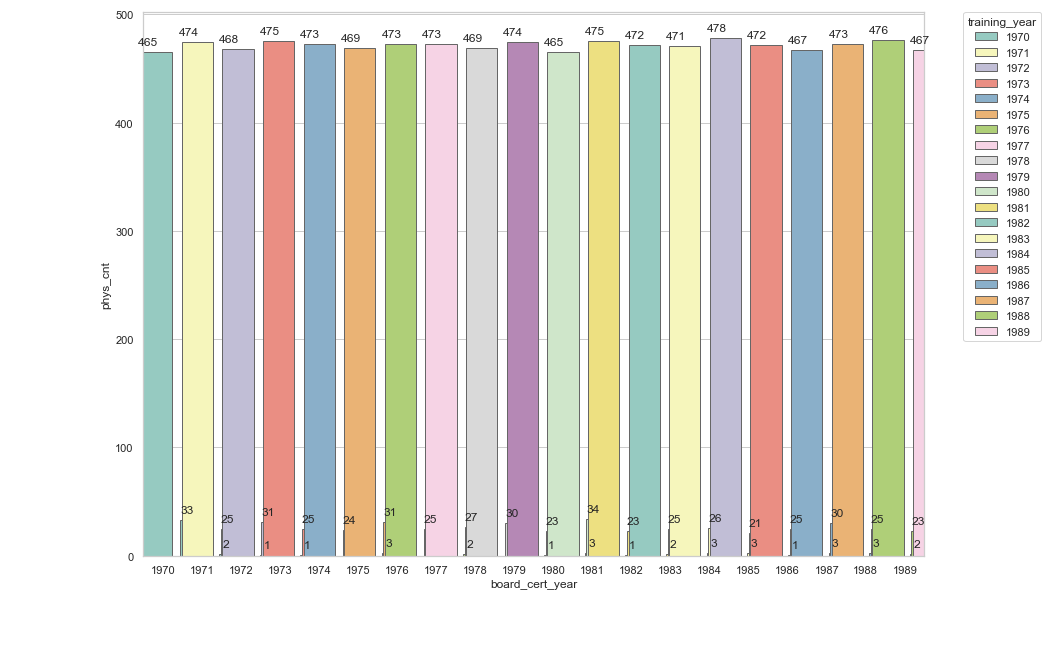

In [40]:
## count of physician for every board cert year, colored by training year
sb.set(style='whitegrid')
dims = (14, 10)
fig, ax = plt.subplots(figsize=dims)
ax = sb.barplot(ax=ax, x='board_cert_year', y='phys_cnt', hue='training_year', data=data_mini_pre_1990, palette='Set3', 
              edgecolor=".4")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
                                                     p.get_height()), ha = 'center', 
                     va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .2)
change_width(ax, .8)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='training_year')

_For those certified before 1990, every training year cohort has an overwhelming number of physicians receiving board certification in the same year. This could be the case in that the certification process was less stringent, thus many
were able to pass. However, it is also possible that this is the norm, since having just completed residency a lot of materials and experience are still fresh and passing the board is not an issue for most._

#### ii. Average rating in each evaluation year for each trained/cert cohort
We will look at every 10 years, which is evaluation year 1980 and evaluation year 1990 to see how the cohorts have changed in terms of average ratings.

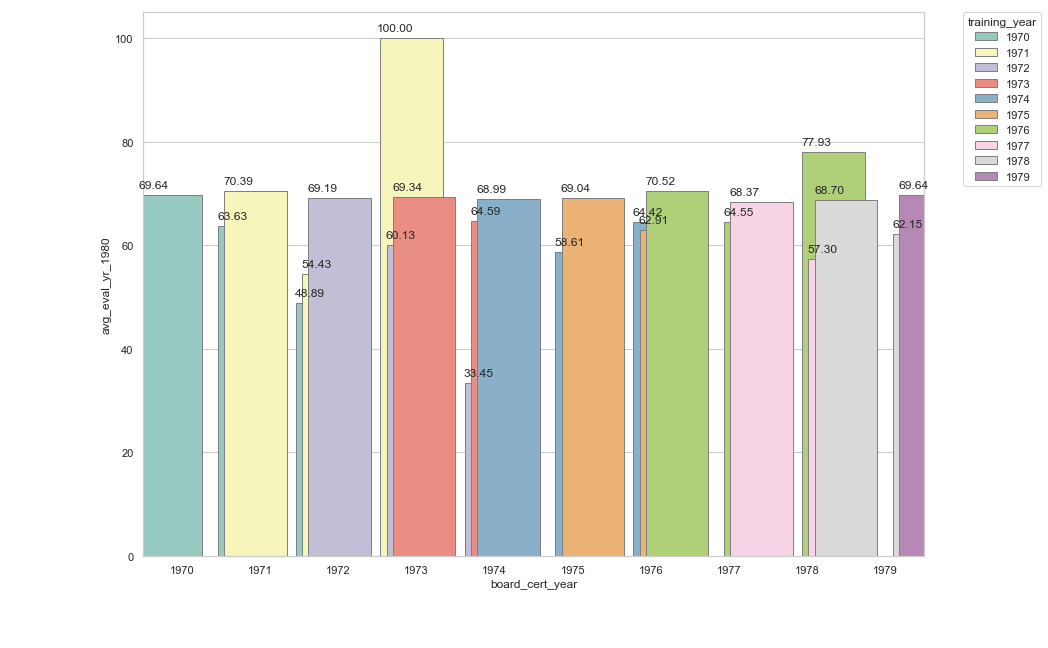

In [41]:
## average rating in evaluation year 1980 for every board cert year, colored by training year
sb.set(style='whitegrid')
dims = (14, 10)
fig, ax = plt.subplots(figsize=dims)
ax = sb.barplot(ax=ax, x='board_cert_year', y='avg_eval_yr_1980', hue='training_year', 
                data=data_mini_pre_1990[data_mini_pre_1990.board_cert_year < 1980], palette='Set3',
                edgecolor=".5")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
                                                     p.get_height()), ha = 'center', 
                     va = 'center', xytext = (0, 10), textcoords = 'offset points')
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .2)
change_width(ax, .8)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='training_year')

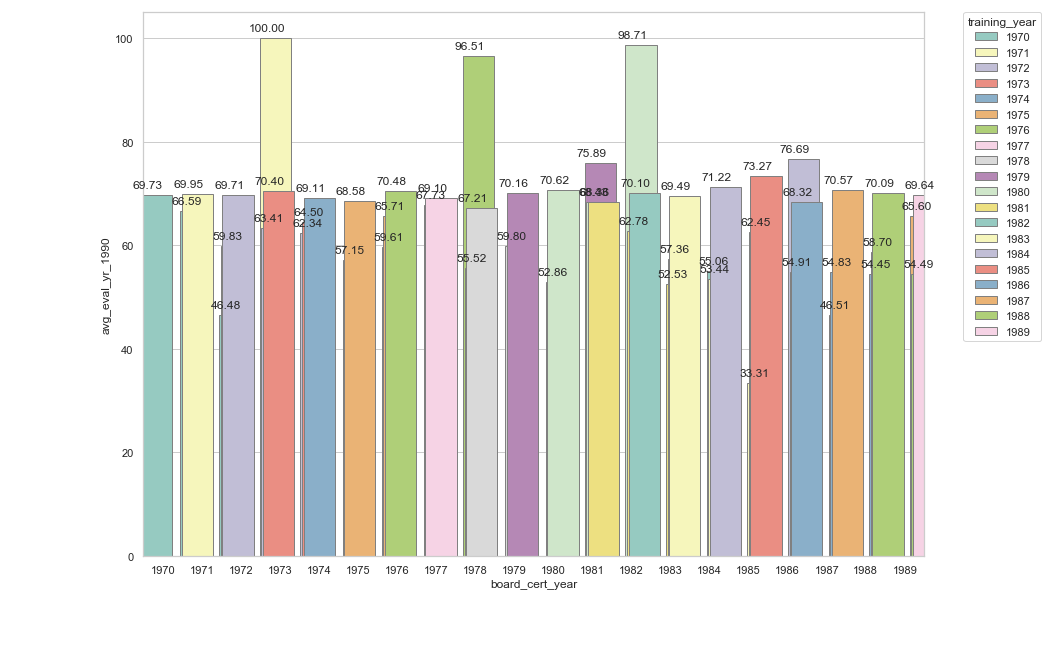

In [42]:
## average rating in evaluation year 1990 for every board cert year, colored by training year
sb.set(style='whitegrid')
dims = (14, 10)
fig, ax = plt.subplots(figsize=dims)
ax = sb.barplot(ax=ax, x='board_cert_year', y='avg_eval_yr_1990', hue='training_year', 
                data=data_mini_pre_1990[data_mini_pre_1990.board_cert_year < 1990], palette='Set3',
                edgecolor=".5")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
                                                     p.get_height()), ha = 'center', 
                     va = 'center', xytext = (0, 10), textcoords = 'offset points')
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .2)
change_width(ax, .8)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='training_year')

_In the evaluation years 1980 and 1990 we can see that, for every training year, cohorts certified in the same year tend to have higher average rating than those taking in subsequent years. This could be the possibility that physicians certified on the first try are more capable and thus inclined to follow guidelines OR that same year certified cohorts just have a lot more physicians. This is why we must look at the amount of physicians with "good" ratings for each cohort._

#### iii. Percentage of physicians with "good" ratings for each trained/cert cohort

**** Values are in %: ****


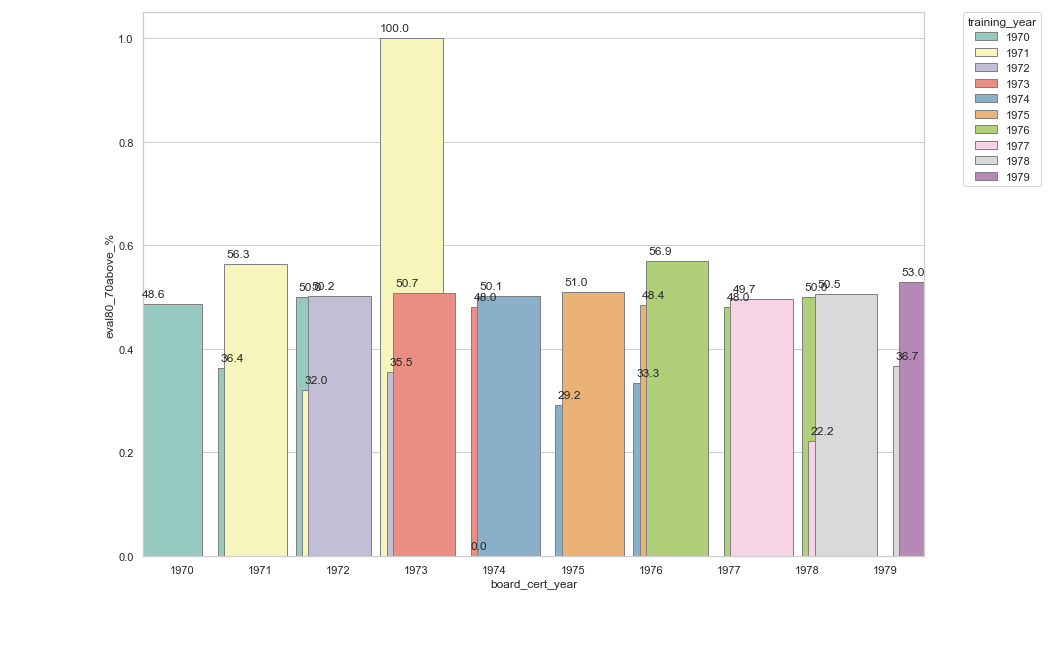

In [46]:
## % of physicians with "good" ratings in evaluation year 1980 for every board cert year, colored by training year
sb.set(style='whitegrid')
dims = (14, 10)
fig, ax = plt.subplots(figsize=dims)
ax = sb.barplot(ax=ax, x='board_cert_year', y='eval80_70above_%', hue='training_year', 
               data=data_mini_pre_1990[data_mini_pre_1990.board_cert_year < 1980], palette='Set3',
               edgecolor=".5")
for p in ax.patches:
    ax.annotate(format(p.get_height()*100, '.1f'), (p.get_x() + p.get_width() / 2., 
                                                     p.get_height()), ha = 'center', 
                     va = 'center', xytext = (0, 10), textcoords = 'offset points')
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .2)
change_width(ax, .8)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='training_year')
print('\033[1m''**** Values are in %: ****')

_The percentage of those with "good" ratings (70+) is generally higher for first year certified, making up 50% on average of their cohort._

**** Values are in %: ****


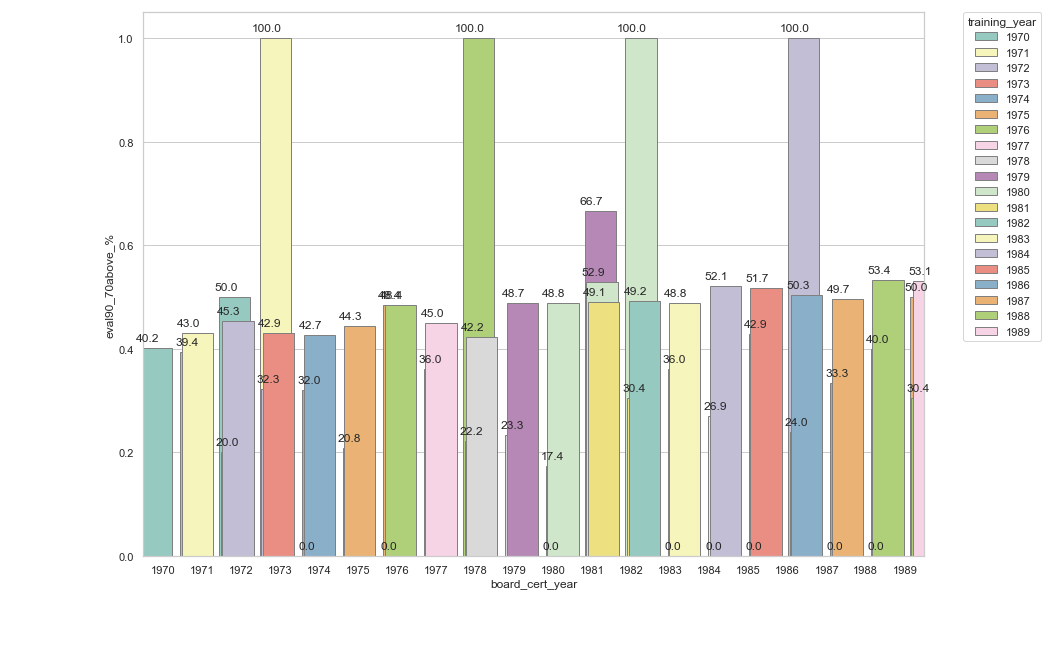

In [47]:
## % of physicians with "good" ratings in evaluation year 1990 for every board cert year, colored by training year
sb.set(style='whitegrid')
dims = (14, 10)
fig, ax = plt.subplots(figsize=dims)
ax = sb.barplot(ax=ax, x='board_cert_year', y='eval90_70above_%', hue='training_year', data=data_mini_pre_1990, palette='Set3',
              edgecolor=".5")
for p in ax.patches:
    ax.annotate(format(p.get_height()*100, '.1f'), (p.get_x() + p.get_width() / 2., 
                                                     p.get_height()), ha = 'center', 
                     va = 'center', xytext = (0, 10), textcoords = 'offset points')
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .2)
change_width(ax, .8)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='training_year')
print('\033[1m''**** Values are in %: ****')

_In evaluation year 1990 the average rating for same year certified cohorts remains consistent at around 68-70. However, it appears that the percentage of physicians with "good" ratings for each cert year cohort has decreased. For example, cohort trained/cert in 1970 had 48.6% with good ratings in evaluation year 1980, but this percentage plummeted to 40.2% in evaluation year 1990. 
<br>
It could be the case that the longer physicians are around the less likely they are to follow guidelines because they don't have time OR they are just older and less capable._

 **Part 1 (pre-1990) Summary:** We have found that in the years prior to 1990--
 <br>
 &emsp;**a.** For every training year there is about 90-95% of physicians certified in the same year
 <br>
 &emsp;**b.** Average rating for same year certified cohorts tend to be higher than those certified in the next years
 <br>
 &emsp;**c.** On average 50% of same year certified cohorts receive "good" ratings, but this percentage tends to drop the longer <br>&emsp;the physicians are around.

#### Part 2 (post-1990)

#### i. Breakdown of physicians and their board certification year for every training year

In [48]:
data_mini_post_1990 = data_mini[data_mini.board_cert_year >= 1990]

In [49]:
data_mini_post_1990.head()

,training_year,board_cert_year,phys_cnt,phys_cnt_%,avg_eval_yr_1971,eval71_phys_cnt_70above,eval71_70above_%,avg_eval_yr_1972,eval72_phys_cnt_70above,eval72_70above_%,avg_eval_yr_1973,eval73_phys_cnt_70above,eval73_70above_%,avg_eval_yr_1974,eval74_phys_cnt_70above,eval74_70above_%,avg_eval_yr_1975,eval75_phys_cnt_70above,eval75_70above_%,avg_eval_yr_1976,eval76_phys_cnt_70above,eval76_70above_%,avg_eval_yr_1977,eval77_phys_cnt_70above,eval77_70above_%,avg_eval_yr_1978,eval78_phys_cnt_70above,eval78_70above_%,avg_eval_yr_1979,eval79_phys_cnt_70above,eval79_70above_%,avg_eval_yr_1980,eval80_phys_cnt_70above,eval80_70above_%,avg_eval_yr_1981,eval81_phys_cnt_70above,eval81_70above_%,avg_eval_yr_1982,eval82_phys_cnt_70above,eval82_70above_%,avg_eval_yr_1983,eval83_phys_cnt_70above,eval83_70above_%,avg_eval_yr_1984,eval84_phys_cnt_70above,eval84_70above_%,avg_eval_yr_1985,eval85_phys_cnt_70above,eval85_70above_%,avg_eval_yr_1986,eval86_phys_cnt_70above,eval86_70above_%,avg_eval_yr_1987,eval87_phys_cnt_70above,eval87_70above_%,avg_eval_yr_1988,eval88_phys_cnt_70above,eval88_70above_%,avg_eval_yr_1989,eval89_phys_cnt_70above,eval89_70above_%,avg_eval_yr_1990,eval90_phys_cnt_70above,eval90_70above_%,avg_eval_yr_1991,eval91_phys_cnt_70above,eval91_70above_%,avg_eval_yr_1992,eval92_phys_cnt_70above,eval92_70above_%,avg_eval_yr_1993,eval93_phys_cnt_70above,eval93_70above_%,avg_eval_yr_1994,eval94_phys_cnt_70above,eval94_70above_%,avg_eval_yr_1995,eval95_phys_cnt_70above,eval95_70above_%,avg_eval_yr_1996,eval96_phys_cnt_70above,eval96_70above_%,avg_eval_yr_1997,eval97_phys_cnt_70above,eval97_70above_%,avg_eval_yr_1998,eval98_phys_cnt_70above,eval98_70above_%,avg_eval_yr_1999,eval99_phys_cnt_70above,eval99_70above_%,avg_eval_yr_2000,eval00_phys_cnt_70above,eval00_70above_%,avg_eval_yr_2001,eval01_phys_cnt_70above,eval01_70above_%,avg_eval_yr_2002,eval02_phys_cnt_70above,eval02_70above_%,tot_avg_evals
53,1988,1990,1,0.002000,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,45.457624,0,0.00000,63.205426,0,0.00000,58.770001,0,0.000000,26.490143,0,0.00000,60.393467,0,0.000000,36.186693,0,0.000000,25.681425,0,0.000000,54.566771,0,0.000000,87.532519,1,1.000000,47.034833,0,0.000000,40.874622,0,0.000000,50.218793,0,0.000000,49.701026
55,1989,1990,32,0.064000,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,61.157809,17,0.53125,54.160624,11,0.34375,59.264914,11,0.343750,61.300357,11,0.34375,60.214871,9,0.281250,53.517362,9,0.281250,53.552393,8,0.250000,55.724019,8,0.250000,54.176496,9,0.281250,62.246938,14,0.437500,62.531975,15,0.468750,58.019178,10,0.312500,57.988911
56,1989,1991,1,0.002000,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.00000,56.330745,0,0.00000,41.903685,0,0.000000,64.008898,0,0.00000,49.725289,0,0.000000,76.983153,1,1.000000,74.857159,1,1.000000,72.820401,1,1.000000,63.306504,0,0.000000,20.000000,0,0.000000,65.666954,0,0.000000,60.228753,0,0.000000,58.711958
57,1990,1990,447,0.975983,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,69.707662,234,0.52349,70.431763,234,0.52349,71.026183,247,0.552573,68.979675,227,0.50783,68.172687,201,0.449664,70.111216,217,0.485459,70.300303,214,0.478747,69.850980,214,0.478747,68.655499,210,0.469799,70.021279,204,0.456376,68.138532,184,0.411633,68.740614,184,0.411633,69.511366
58,1990,1992,10,0.021834,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,

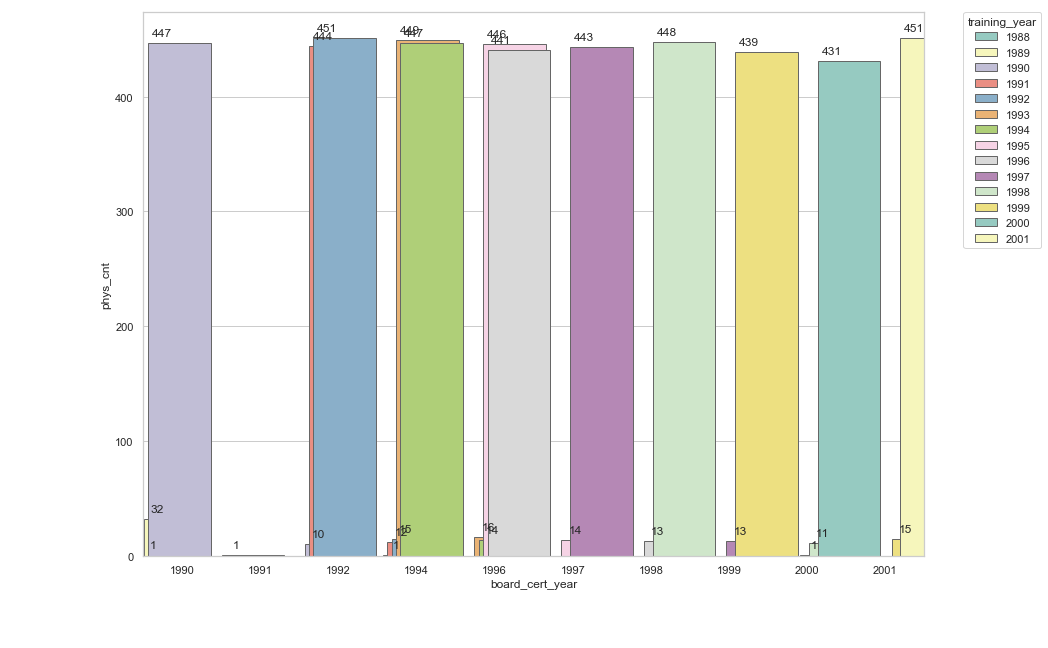

In [50]:
## count of physician for every board cert year, colored by training year
sb.set(style='whitegrid')
dims = (14, 10)
fig, ax = plt.subplots(figsize=dims)
ax = sb.barplot(ax=ax, x='board_cert_year', y='phys_cnt', hue='training_year', data=data_mini_post_1990, palette='Set3', 
              edgecolor=".4")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
                                                     p.get_height()), ha = 'center', 
                     va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .2)
change_width(ax, .8)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='training_year')

_After 1990 we do see physicians trained in years 1991, 1993, and 1995 all passed their board certifications in subsequent years. This is either because they did not want to take the certification in the same year or failed and had to retake._

#### ii. Average rating in each evaluation year for each trained/cert cohort

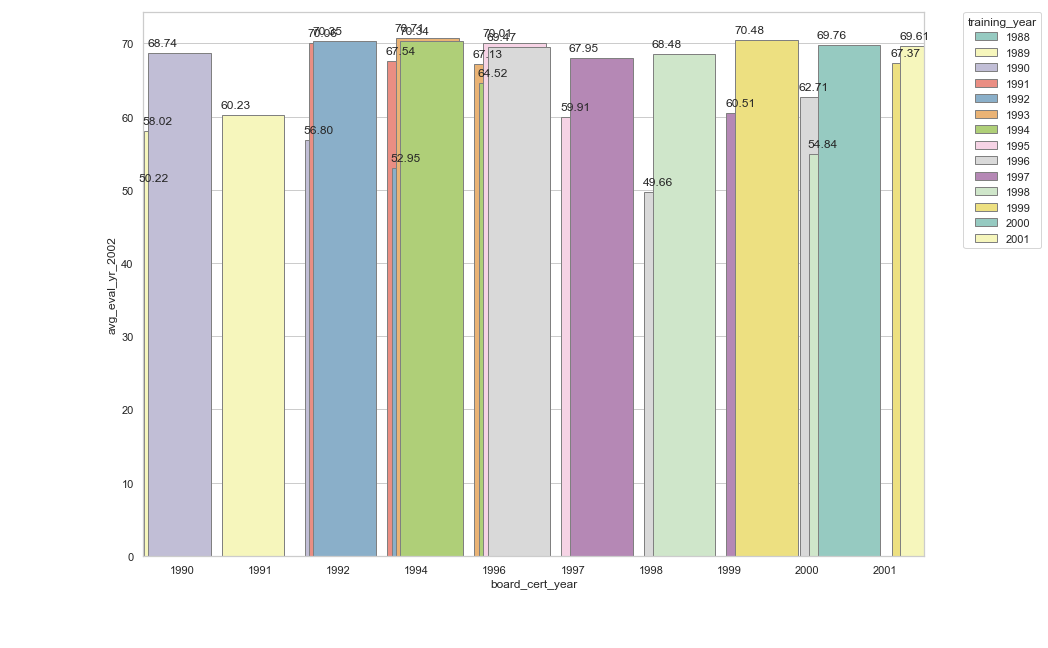

In [51]:
## average rating in evaluation year 2002 for every board cert year, colored by training year
sb.set(style='whitegrid')
dims = (14, 10)
fig, ax = plt.subplots(figsize=dims)
ax = sb.barplot(ax=ax, x='board_cert_year', y='avg_eval_yr_2002', hue='training_year', 
                data=data_mini_post_1990, palette='Set3',
                edgecolor=".5")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
                                                     p.get_height()), ha = 'center', 
                     va = 'center', xytext = (0, 10), textcoords = 'offset points')
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .2)
change_width(ax, .8)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='training_year')

_Average rating for certified same year cohorts are typically higher than that for certified subsequent years cohorts._

#### iii. Percentage of physicians with "good" ratings for each trained/cert cohort

**** Values are in %: ****


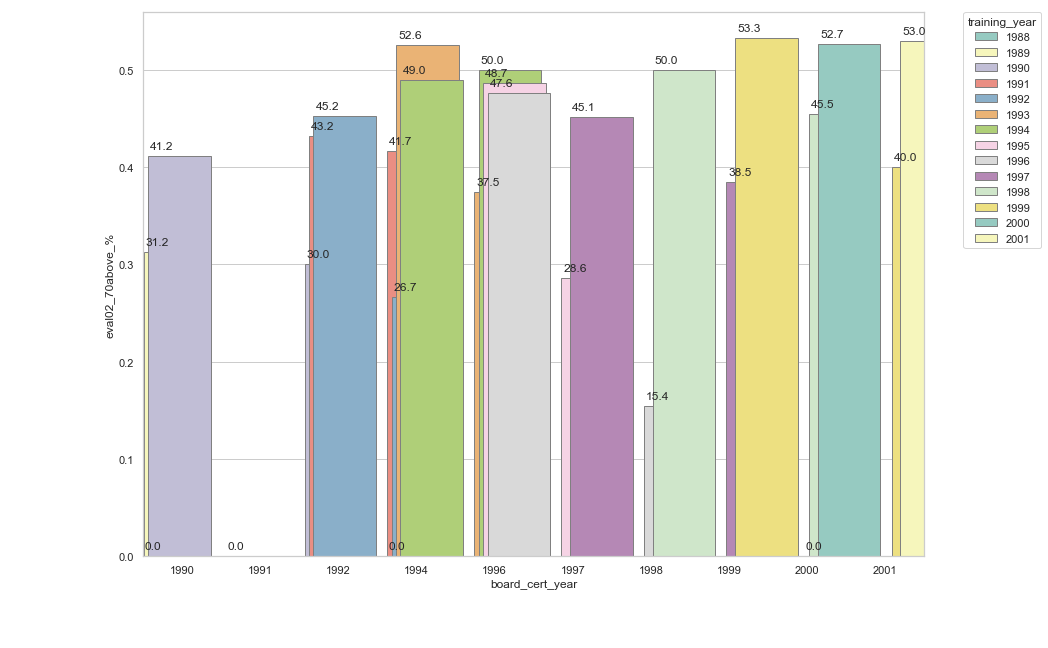

In [220]:
## % of physicians with "good" ratings in evaluation year 2002 for every board cert year, colored by training year
sb.set(style='whitegrid')
dims = (14, 10)
fig, ax = plt.subplots(figsize=dims)
ax = sb.barplot(ax=ax, x='board_cert_year', y='eval02_70above_%', hue='training_year', data=data_mini_post_1990, palette='Set3',
              edgecolor=".5")
for p in ax.patches:
    ax.annotate(format(p.get_height()*100, '.1f'), (p.get_x() + p.get_width() / 2., 
                                                     p.get_height()), ha = 'center', 
                     va = 'center', xytext = (0, 10), textcoords = 'offset points')
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .2)
change_width(ax, .8)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='training_year')
print('\033[1m''**** Values are in %: ****')

_The percentage of those with "good" ratings (70+) is generally higher for first year certified, making up 50% on average of their cohort._

 **Part 2 (post-1990) Summary:** We have found that in the years after 1990--
 <br>
 &emsp;**a.** Physicians in years 1991, 1993, 1995 primarily are certified in subsequent years
 <br>
 &emsp;**b.** Average rating for same year certified cohorts tend to be higher than those certified in the next years
 <br>
 &emsp;**c.** On average 50% of same year certified cohorts receive "good" ratings, but this percentage tends to drop the longer 
 <br>&emsp;the physicians are around.

## V. Feature Engineering 

We not only want to answer the questions posed, but also have an idea on what to recommend in light of our findings. For this we want to develop a model that can predict whether or not a physician would on average receive "good" ratings and be able to extract feature importances from the model. Some feature engineering is required. Some features that could help predict "good" ratings are:
<br>
**cert_yrs_from_res:** years that it took to get certified (difference between training year and certification year)
<br>
**tot_avg_eval:** average rating of all evaluation years
<br>
**#_yrs_evaluated:** how many years the physician was evaluated
<br>
**cert_before_1990:** if physician was certified before 1990
<br>
**avg_eval_goodornot:** if average rating of all evaluation years is 70 and above

In [250]:
## create new features
data['cert_yrs_from_res'] = data['board_cert_year'] - data['training_year']
data['tot_avg_eval'] = data[[
     'eval_yr_1971'
    ,'eval_yr_1972'
    ,'eval_yr_1973'
    ,'eval_yr_1974'
    ,'eval_yr_1975'
    ,'eval_yr_1976'
    ,'eval_yr_1977'
    ,'eval_yr_1978'
    ,'eval_yr_1979'
    ,'eval_yr_1980'
    ,'eval_yr_1981'
    ,'eval_yr_1982'
    ,'eval_yr_1983'
    ,'eval_yr_1984'
    ,'eval_yr_1985'
    ,'eval_yr_1986'
    ,'eval_yr_1987'
    ,'eval_yr_1988'
    ,'eval_yr_1989'
    ,'eval_yr_1990'
    ,'eval_yr_1991'
    ,'eval_yr_1992'
    ,'eval_yr_1993'
    ,'eval_yr_1994'
    ,'eval_yr_1995'
    ,'eval_yr_1996'
    ,'eval_yr_1997'
    ,'eval_yr_1998'
    ,'eval_yr_1999'
    ,'eval_yr_2000'
    ,'eval_yr_2001'
    ,'eval_yr_2002']].mean(axis=1, skipna=True)
data['#_yrs_evaluated'] = data[[
     'eval_yr_1971'
    ,'eval_yr_1972'
    ,'eval_yr_1973'
    ,'eval_yr_1974'
    ,'eval_yr_1975'
    ,'eval_yr_1976'
    ,'eval_yr_1977'
    ,'eval_yr_1978'
    ,'eval_yr_1979'
    ,'eval_yr_1980'
    ,'eval_yr_1981'
    ,'eval_yr_1982'
    ,'eval_yr_1983'
    ,'eval_yr_1984'
    ,'eval_yr_1985'
    ,'eval_yr_1986'
    ,'eval_yr_1987'
    ,'eval_yr_1988'
    ,'eval_yr_1989'
    ,'eval_yr_1990'
    ,'eval_yr_1991'
    ,'eval_yr_1992'
    ,'eval_yr_1993'
    ,'eval_yr_1994'
    ,'eval_yr_1995'
    ,'eval_yr_1996'
    ,'eval_yr_1997'
    ,'eval_yr_1998'
    ,'eval_yr_1999'
    ,'eval_yr_2000'
    ,'eval_yr_2001'
    ,'eval_yr_2002']].count(axis=1)
data['cert_after_1990'] = np.where(data['board_cert_year']>=1990,1,0)
data['avg_eval_goodornot'] = np.where(data['tot_avg_eval']>=70,1,0)

In [251]:
data.head()

,physician_uid,training_year,board_cert_year,eval_yr_1971,eval_yr_1972,eval_yr_1973,eval_yr_1974,eval_yr_1975,eval_yr_1976,eval_yr_1977,eval_yr_1978,eval_yr_1979,eval_yr_1980,eval_yr_1981,eval_yr_1982,eval_yr_1983,eval_yr_1984,eval_yr_1985,eval_yr_1986,eval_yr_1987,eval_yr_1988,eval_yr_1989,eval_yr_1990,eval_yr_1991,eval_yr_1992,eval_yr_1993,eval_yr_1994,eval_yr_1995,eval_yr_1996,eval_yr_1997,eval_yr_1998,eval_yr_1999,eval_yr_2000,eval_yr_2001,eval_yr_2002,cert_yrs_from_res,tot_avg_eval,#_yrs_evaluated,cert_before_1990,avg_eval_goodornot,cert_after_1990
0,10000831640,1970,1970,45.558857,56.595450,53.878878,36.174120,58.222748,23.343721,29.327773,77.707741,48.462271,50.294023,33.502006,44.763913,53.831220,20.000000,48.412999,51.563866,40.661628,49.788089,75.875262,20.0000,43.265894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.772879,0,45.772879,22,1,0,0
1,10001811121,1970,1970,49.955430,80.417479,97.212223,74.138971,78.050364,100.000000,99.708405,61.196762,89.460141,66.048597,78.430866,94.370367,91.981254,77.528190,81.768735,71.433983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.731361,0,80.731361,17,1,1,0
2,10002674776,1970,1970,71.721077,83.536145,66.805359,44.746217,54.165204,100.000000,100.000000,84.145488,92.918523,82.623151,67.918185,66.336980,57.731265,100.000000,71.765654,63.114344,75.078860,86.987376,50.698319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.752218,0,74.752218,20,1,1,0
3,10003837524,1970,1970,82.726071,94.658082,85.321196,99.326632,85.505298,94.673752,59.769285,100.000000,91.684239,83.074014,94.449150,62.023613,100.000000,90.097702,97.034406,85.566479,97.434985,99.454431,100.000000,100.0000,84.305441,100.0,100.0,85.079873,91.88697,NaN,NaN,NaN,NaN,NaN,NaN,90.562865,0,90.562865,26,1,1,0
4,10004856810,1970,1970,67.395845,27.988807,41.587377,30.847542,47.348051,30.036957,71.645535,41.286300,29.784817,37.796494,84.564122,48.285947,84.327049,47.106156,78.410072,47.818587,43.660272,61.956948,52.033791,25.8418,28.439319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.960085,0,48.960085,22,1,0,0


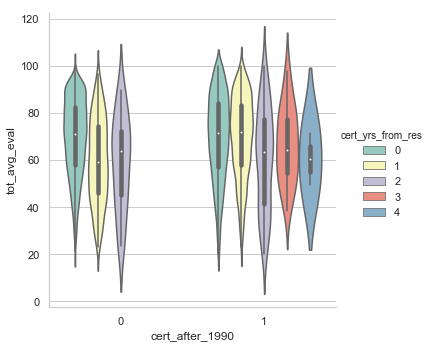

In [274]:
sb.set(style='whitegrid')
ax = sb.catplot( x='cert_after_1990', y='tot_avg_eval', hue='cert_yrs_from_res', 
                data=data, palette='Set3', kind='violin')

In [275]:
data_new = data

In [276]:
## impute nulls for physicians without ratings with their average rating
data_new['eval_yr_2002'] = data_new['eval_yr_2002'].fillna(data['tot_avg_eval'])

In [277]:
## include features
data_new = data_new[['physician_uid', 'training_year', 'eval_yr_2002', 'cert_yrs_from_res', 
             '#_yrs_evaluated', 'cert_after_1990', 'avg_eval_goodornot']]

In [278]:
## create dummy variables for training years
training_yr = pd.get_dummies(data_new['training_year'])

In [279]:
data_new = data_new.drop('training_year', axis=1)

In [280]:
data_new = pd.concat([data_new,training_yr], axis=1)

In [281]:
data_new.head()

,physician_uid,eval_yr_2002,cert_yrs_from_res,#_yrs_evaluated,cert_after_1990,avg_eval_goodornot,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001
0,10000831640,45.772879,0,22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10001811121,80.731361,0,17,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10002674776,74.752218,0,20,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10003837524,90.562865,0,26,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10004856810,48.960085,0,22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## VI. Model Selection 

In [282]:
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict, train_test_split, KFold
from sklearn.metrics import roc_auc_score

In [283]:
data_modeling = data_new

In [284]:
## we will predict whether or not average rating is "good"
target = 'avg_eval_goodornot'
id_col = 'physician_uid'

In [285]:
## for a small dataset, it is better to leave more records for training, thus we choose 90% training, 10% test split
seed = 7
test_size = 0.1
x_train, x_test, y_train, y_test = train_test_split(data_modeling.drop([target, id_col], axis=1),
                                                   data_new[target], 
                                                   test_size=test_size,
                                                   random_state=seed)

In [286]:
train=pd.concat([x_train, y_train],axis=1)

In [287]:
## choose xgboost classifier
from xgboost import XGBClassifier

In [288]:
## function to get features importance based on model fit
def get_feature_importances(alg):
    #to get the feature importances based on xgboost we use fscore
    feat_imp = pd.Series(alg._Booster.get_fscore()).sort_values(ascending=False)
    #feat_imp = pd.Series(xgb.booster.get_fscore()).sort_values(ascending=False)
    print(feat_imp)
    
    #this shows the feature importances on a bar chart
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [289]:
def drop_features(l):
    return [x for x in train.columns if x not in l]

In [290]:
def xgb_class (learning_rate=0.08, n_estimators=1500, max_depth=50, min_child_weight=1, gamma=0, subsample=0.7, colsample_bytree=0.8):
    xgb_1 = XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators, 
                       max_depth=max_depth, min_child_weight=min_child_weight, 
                       gamma=gamma, subsample=subsample, colsample_bytree=colsample_bytree)
  
    return xgb_1

In [291]:
predictors = drop_features([target, id_col])
model_1 = xgb_class()
train_model_1 = model_1.fit(x_train, y_train)

In [292]:
pred_1 = train_model_1.predict(x_test)

C:\Users\msngu\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## VII. Model Evaluation 

In [293]:
print(classification_report(y_test, pred_1))

             precision    recall  f1-score   support

          0       0.81      0.78      0.79       772
          1       0.79      0.82      0.80       776

avg / total       0.80      0.80      0.80      1548



In [294]:
print(accuracy_score(y_test, pred_1))

0.7984496124031008


eval_yr_2002         227378
#_yrs_evaluated       48580
cert_yrs_from_res      3869
cert_after_1990        3454
1997                   1571
1987                   1422
1983                   1408
1988                   1387
1986                   1386
1984                   1377
1992                   1377
1985                   1304
1994                   1291
1993                   1289
1998                   1270
1990                   1265
1989                   1264
1974                   1251
1996                   1244
1980                   1242
1981                   1239
1975                   1154
1971                   1149
1976                   1133
1972                   1070
1979                   1000
1982                    983
1991                    955
1977                    898
1978                    855
1973                    839
1995                    796
1999                    755
1970                    741
2000                    629
2001                

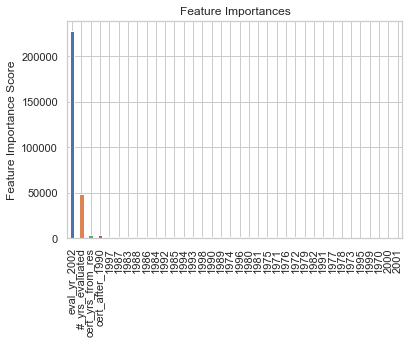

In [295]:
get_feature_importances(train_model_1)

In [298]:
## print area under the receiver operating characteristic Curve
roc_auc_score(y_test, pred_1).round(1)

0.8

## VIII. Conclusion 

From our analysis we found that pre-1990 certified physicians typically obtained certification in the same year of residency completion and same-year certified cohorts tend to score higher in adherence evaluations than those certified in subsequent years. The average rating is 69 and about 50% of same-year certified cohorts receive 70 or above, which would be consider "good".
<br>
When we don't distinguish pre-1990 certified physicians from post-1990, we see that average evaluations in years 1990 and after are higher, but this is possibly due to older physicians no longer practicing and therefore not evaluated or those who do not typically adhere to guidelines eventually drop out because we do see physicians trained in 1990s no longer being evaluated (even though they're only around for 10 years or less). There is also less overall count of physicians certified in years after 1990 (less than the typical yearly count of 500). This could be either after 1990 physicians know the certification process is too stringent and less want to participate or there could be less physicians in general. 
<br>
After analyzing pre-1990 and post-1990 physicians separately, we do not observe much difference in terms of average ratings and percentage of cohorts receiving "good" ratings.
<br>
Our model does a decent job predicting who is more likely to receive a "good" rating and have identified eval_yr_2002 and #_yrs_evaluated as important features. It makes sense that the latest evaluation year and how many years a physician was rated hold predictive power. We can see that the cert_before_1990 has little power in predicting, so it does not matter whether a physician is certified before or after 1990. 
<br>
**Recommendation**
<br>
We don't have data on how well non-certified physicians would do in adherence evaluations, so data here does not suggest that certification means a physician would be more likely to follow clinical guidelines. It could be the case where more capable physicians do not feel they need certification to prove their abilities. Thus, making certification more difficult could mean that physicians who are less capable would try to get certified while more capable physicians would choose to forgo it altogether. Since we do see that the more years a physician has would mean more likely to receive "good" ratings, the board can look into adding more "experience" hours to the certification process rather than making physicians taking maintenance-of-certification. 